<a href="https://colab.research.google.com/github/gio-bis/MLPNS2021/blob/main/layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy  as np
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression, RidgeClassifierCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import ensemble
from sklearn import metrics
from sklearn import tree
!  brew install graphviz
import graphviz
import pylab as pl
pl.rcParams["font.size"] = 18
pl.rcParams["figure.figsize"] = (10,10)
%pylab inline
import os, zipfile

/bin/bash: brew: command not found
Populating the interactive namespace from numpy and matplotlib


In [18]:
X = np.array([[0,0,1],
             [0,1,1],
             [1,0,1],
             [1,1,1]])

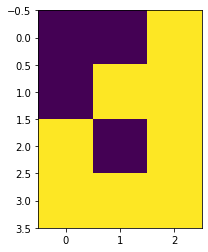

In [19]:
pl.imshow(X)

In [20]:
y = np.array([[0,1,1,0]]).T
y

array([[0],
       [1],
       [1],
       [0]])

In [21]:
def sigmoid(x):
  return 1. / (1 + np.exp(-x))

In [22]:
def loss(prediction):
  return y - prediction

In [34]:
def dsigmoid(x):
  return x * (1 - x)

In [23]:
training = 6000

In [28]:
np.random.seed(1) #affinché il network sia deterministico siccome uso numeri casuali

In [38]:
syn0 = 2 * np.random.random((3, 1)) - 1
for inter in range(training):
  inputLayer = X
  l1 = np.dot(inputLayer, syn0)
  output = sigmoid(l1)
  output_error = loss(output)
  output_delta = output_error * dsigmoid(output)

  syn0 += np.dot(inputLayer.T, output_delta)
print(output)
print(y)

[[0.5]
 [0.5]
 [0.5]
 [0.5]]
[[0]
 [1]
 [1]
 [0]]


In [47]:
np.random.seed(1)

syn0 = 2 * np.random.random((3, 4)) - 1
syn1 = 2 * np.random.random((4, 1)) - 1

print (syn0.shape, "\n", syn1.shape)

loss_hidden = []
loss_output = []

#layers
for iterate in range(training):
  inputLayer = X
  la1 = np.dot(inputLayer, syn0)
  layer1out = sigmoid(la1)

  la2 = np.dot(layer1out, syn1)
  outputLayer = sigmoid(la2)

  outputLayer_error = loss(outputLayer)
  loss_output.append(outputLayer_error.sum())
  outputLayer_delta = outputLayer_error * dsigmoid(outputLayer)

  l1_error = outputLayer_delta.dot(syn1.T)
  loss_hidden.append(l1_error.sum())
  l1_delta = l1_error * dsigmoid(layer1out)
 
  # back propagation step
  # multiply how much we missed by the
  # slope of the sigmoid at the values in l1

  syn1 += outputLayer.T.dot(outputLayer_delta)
  syn0 += inputLayer.T.dot(l1_delta)
  
print ("Final Prediction:\n", outputLayer)

print ("target: \n", y)

(3, 4) 
 (4, 1)
Final Prediction:
 [[0.31835034]
 [0.66565209]
 [0.74911233]
 [0.50144929]]
target: 
 [[0]
 [1]
 [1]
 [0]]


Text(0, 0.5, 'loss')

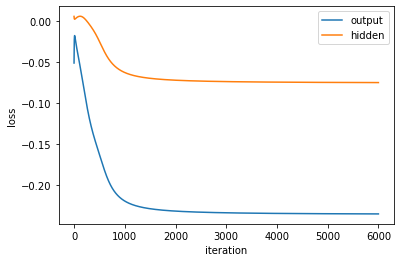

In [48]:
pl.plot(loss_output, label = "output")
pl.plot(loss_hidden, label = "hidden")
pl.legend()
pl.xlabel("iteration")
pl.ylabel("loss")

In [49]:
layer1out

array([[9.38412798e-01, 6.61114358e-03, 9.80056918e-01, 1.15596724e-02],
       [2.17502406e-02, 2.21368827e-07, 7.33249344e-03, 9.85529858e-01],
       [3.51248388e-02, 9.86805185e-01, 1.15306887e-02, 7.36326843e-07],
       [5.31166914e-05, 2.48146616e-03, 1.75339654e-06, 4.26986876e-03]])